# <ins>**Probability Theory**</ins>

## **Importance to Data Science**
Probability is the foundation of statistical methods. It plays a key role in data science themes like probabilistic models such as *Bayesian networks* and *Gaussian processes*, further expanding to machine learning algorithms. It is also critical to understand probability theory when doing error analysis and risk assessments. In this document we wont dive deep into any of these subjects but explore the core basics of understanding several probability concepts. However you might see these fancier applications in the future documents. Overall, probability theory provides the mathematical framework and tools necessary for dealing with the inherent uncertainty and variability in data, making it indispensable in data science for analysis, modeling, prediction, and decision-making.


****

## **Basic Probability**

### <ins>Definitions</ins>
If you read the past documents before jumping into this one, you might feel like being on a vacation because a lot of concepts in probability are easier to understand than in linear algebra or calculus. This is my "unbiased" opinion.

First we should define few reoccurring words that you will see throughout the document:
- **Probability**: The likelyhood that an event will occur, ranging from 0 (impossible event) to 1 (certain event).
- **Experiment**: An activity with uncertain outcome, rolling a die.
- **Sample Space $(S)$**: The set of all possible outcomes of an experiment. For example $S = \{1, 2, 3, 4, 5, 6\}$ for a die roll.
- **Event**: A subset of the sample space. For example rolling an even number $A = \{2,4,6\}$.

### <ins>Calculating Probability</ins>
- The probability of an event $A$ occurring is:
$$
P(A) = \frac{\text{Number of favorable outcomes}}{\text{Total number of possible outcomes}}
$$

Makes common sense if you think about it. Now here are couple examples:

1. Rolling a die:
    - Sample space: $S$ = \{1,2,3,4,5,6\}
    - Event: Rolling a $3$
    - Probability:
    $$
    P(\text{Drawing an Ace}) = \frac{1}{6}
    $$

2. Drawing a card from a deck
    - Sample space: 52 cards
    - Event: Drawing an ace
    - Probability
    $$
    P(\text{Drawing an ace}) = \frac{4}{52} = \frac{1}{13}
    $$

### <ins>Probability Rules</ins>
There are way more rules than listed in this document, but here are the basic ones you should know:

- **Complementary Events**: The probability of the complement of an event $A$ (denoted as $A^c$) is:
$$
P(A^c) = 1 - P(A)
$$

- **Union of Events**: The probability that either event $A$ or event $B$ occurs (or both):
$$
P(A \cup B) = P(A) + P(B) - P(A \cap B)
$$

- **Intersection of Events**: The probability that both events $A$ and $B$ occur (if $A$ and $B$ are independent):
$$
P(A \cap B) = P(A) \times P(B)
$$

### <ins>Python Examples of Basic Probability</ins>
Here are few examples of how to calculate basic probabilities in Python as well as applying probability rules

#### Rolling a Die

In [1]:
import random

# Simulate rolling a die
def roll_die():
    return random.randint(1, 6)

# Number of simulations
num_simulations = 100000
count_3 = 0

for _ in range(num_simulations):
    if roll_die() == 3:
        count_3 += 1

# Estimated probability
prob_3 = count_3 / num_simulations
print(f"Estimated Probability of rolling a 3: {prob_3}")

Estimated Probability of rolling a 3: 0.16744


#### Drawing a Card from a Deck

In [2]:
# Simulate drawing a card
def draw_card():
    deck = ['Ace'] * 4 + ['Non-Ace'] * 48
    return random.choice(deck)

# Number of simulations
num_simulations = 100000
count_ace = 0

for _ in range(num_simulations):
    if draw_card() == 'Ace':
        count_ace += 1

# Estimated probability
prob_ace = count_ace / num_simulations
print(f"Estimated Probability of drawing an Ace: {prob_ace}")

Estimated Probability of drawing an Ace: 0.07577


#### Complementary Events

In [3]:
# Probability of drawing a non-Ace card
prob_non_ace = 1 - (4 / 52)
print(f"Probability of drawing a non-Ace card: {prob_non_ace}")

Probability of drawing a non-Ace card: 0.9230769230769231


#### Union of Events (Rolling a 2 or 4)

In [4]:
# Simulate rolling a die
def roll_die():
    return random.randint(1, 6)

# Number of simulations
num_simulations = 100000
count_2_or_4 = 0

for _ in range(num_simulations):
    if roll_die() in [2, 4]:
        count_2_or_4 += 1

# Estimated probability
prob_2_or_4 = count_2_or_4 / num_simulations
print(f"Estimated Probability of rolling a 2 or 4: {prob_2_or_4}")

Estimated Probability of rolling a 2 or 4: 0.33258


#### Intersection of Independent Events (Rolling a 2 and flipping a head)

In [5]:
# Simulate flipping a coin
def flip_coin():
    return random.choice(['Heads', 'Tails'])

# Number of simulations
num_simulations = 100000
count_2_and_heads = 0

for _ in range(num_simulations):
    if roll_die() == 2 and flip_coin() == 'Heads':
        count_2_and_heads += 1

# Estimated probability
prob_2_and_heads = count_2_and_heads / num_simulations
print(f"Estimated Probability of rolling a 2 and flipping Heads: {prob_2_and_heads}")

Estimated Probability of rolling a 2 and flipping Heads: 0.08437


****

## **Conditional Probability**

### <ins>Definition</ins>
Conditional probability measures the probability of and event occurring given that another event has already occurred. It is denoted by $P(A|B)$, which reads as "the probability of $A$ given $B$.

The formula for solving conditional probability is:
$$
P(A|B) = \frac{P(A \cap B)}{P(B)}
$$

provided that $P(B) > 0$. Because obviously you cannot divide with $0$.
- $P(A \cap B)$: Probability that both events $A$ and $B$ occur.
- $P(B)$: Probability that event $B$ occurs. 

### <ins>Examples</ins>
Lets look at couple examples for clarity.

#### Example 1: Drawing cards
- Event $A$: Drawing an ace.
- Event $B$: Drawn ace is a red card (hearts or diamonds).

Calculate $P(A|B)$:
- Total number of cards = $52$.
- Number of red cards = $26$.
- Number of red aces = $2$.
$$
P(A \cap B) = \frac{2}{52} = \frac{1}{26}
$$

$$
P(B) = \frac{26}{52} = \frac{1}{2}
$$

so,

$$
P(A|B) = \frac{P(A \cap B)}{P(B)} = \frac{\frac{1}{26}}{\frac{1}{2}} = \frac{2}{26} = \frac{1}{13}
$$

#### Example 2: Rolling a Die
- Event $A$: Rolling an even number.
- Event $B$: Rolling a number greater than $3$.

Calculate $P(A|B)$:
- Sample space: $S = \{1,2,3,4,5,6\}$.
- $A = \{2, 4, 6\}$ (even numbers).
- $B = \{4, 5, 6\}$ (greater than $3$).
- $A \cap B = \{4, 6\}$ (even numbers greater than $3$).

$$
P(A \cap B) = \frac{2}{6} = \frac{1}{3}
$$

$$
P(B) = \frac{3}{6} = \frac{1}{2}
$$

so,

$$
P(A|B) = \frac{P(A \cap B)}{P(B)} = \frac{\frac{1}{3}}{\frac{1}{2}} = \frac{2}{3}
$$

### <ins>Python Examples of Conditional Probability</ins>
Lets turn those examples into Python code similarly to the examples we did with basic probability.

#### Drawing Cards

In [6]:
# Simulate drawing a card
def draw_card():
    # 'R' for red cards, 'B' for black cards, 'A' for Ace, 'N' for Non-Ace
    deck = ['RA', 'RA'] + ['RN'] * 24 + ['BA'] * 2 + ['BN'] * 24
    return random.choice(deck)

# Number of simulations
num_simulations = 100000
count_ace_given_red = 0
count_red = 0

for _ in range(num_simulations):
    card = draw_card()
    if 'R' in card:
        count_red += 1
        if 'A' in card:
            count_ace_given_red += 1

# Estimated conditional probability
prob_ace_given_red = count_ace_given_red / count_red
print(f"Estimated Probability of drawing an Ace given that the card is red: {prob_ace_given_red}")

Estimated Probability of drawing an Ace given that the card is red: 0.07907527918373905


#### Rolling a Die

In [7]:
# Simulate rolling a die
def roll_die():
    return random.randint(1, 6)

# Number of simulations
num_simulations = 100000
count_even_given_greater_than_3 = 0
count_greater_than_3 = 0

for _ in range(num_simulations):
    roll = roll_die()
    if roll > 3:
        count_greater_than_3 += 1
        if roll % 2 == 0:
            count_even_given_greater_than_3 += 1

# Estimated conditional probability
prob_even_given_greater_than_3 = count_even_given_greater_than_3 / count_greater_than_3
print(f"Estimated Probability of rolling an even number given that the roll is greater than 3: {prob_even_given_greater_than_3}")

Estimated Probability of rolling an even number given that the roll is greater than 3: 0.6660939060939061


****

## **Bayes' Theorem**
Bayes' theorem allows us to revise out beliefs in light of new evidence. It helps us calculate the probability of an event after considering new information.

### <ins>Definition</ins>
Bayes' theorem provides a way to update the probability of a hypothesis, $A$, given new evidence, $B$. It combines prior knowledge with new data to give a posterior probability. 

The formula is: 
$$
P(A|B) = \frac{P(B|A) \times P(A)}{P(B)}
$$

where:
- $P(A|B)$ is the posterior probability: the probability of $A$ given $B$ (what we are trying to find).
- $P(B|A)$ is the likelihood: the probability of $B$ given $A$.
- $P(A)$ is the prior probability: the initial probability $A$.
- $P(B)$ is the marginal likelihood: the total probability of $B$.

### <ins>Examples</ins>
Since probability as a subject is somewhat lesser-abstract concept, it is beneficial to understand it with real-world examples as we saw earlier. We are going to do the same here and hopefully that formula makes more sense. 

#### Example 1: Medical Diagnosis
Suppose a test for a disease is 99% accurate (true positive rate) and has a 1% false positive rate. The disease prevalence in the population is 0.05%. If a person tests positive, what is the probability they actually have the disease? 

Lets define:
- $A$: The event that the person has the disease.
- $B$: The event that the person tests positive.

We are given:
- $P(A) = 0.005$ (prior probability)
- $P(B|A) = 0.99$ (likelihood)
- $P(B|A^c) = 0.01$ (false positive rate, where $A^c$ is the event that the person does not have the disease)

Now we need to find $P(A|B)$.

First, calculate $P(B)$:
$$
P(B) = P(B|A) \times P(A) + P(B|A^c) \times P(A^c)
$$

$$
P(B) = (0.99 \times 0.005) + (0.01 \times 0.995) = 0.00495 + 0.00995 = 0.0149
$$

Now we use the Bayes' theorem:
$$
P(A|B) = \frac{P(B|A) \times P(A)}{P(B)} = \frac{0.99 \times 0.005}{0.149} \approx 0.332
$$

So the probability that the person actually has the disease given a positive test result is about 33.2%. Maybe they should find more accurate tests.

#### Example 2: Spam Filtering
Suppose you have an email spam filter that uses Bayesian inference to determine whether an email is spam. We know that:
- 20% of emails are spam ($P(\text{Spam}) = 0.2$).
- A certain word appears in 50% of spam emails ($P(\text{Word}|\text{Spam}) = 0.5$).
- The same word appears in 5% of non-spam emails ($P(\text{Word}|\text{Not Spam}) = 0.05$).

If an email contains this word, what is the probability that is is spam?

Lets define:
- $A$: The event that the email is spam.
- $B$: The event that the email contains the word.

We are given: 
- $P(A) = 0.2$
- $P(B|A) = 0.5$ 
- $P(B|A^c) = 0.05$ 

Next we find $P(A|B)$.

Calculate $P(B)$:
$$
P(B) = (0.5 \times 0.2) + (0.05 \times 0.8) = 0.14
$$

Apply Bayes' theorem:
$$
P(A|B) = \frac{0.5 \times 0.2}{0.14} \approx 0.714
$$

So we can conclude that the person needs to stop signing up for random websites, because there is about 71.4% chance that their email is spam.

### <ins>Python Examples of Bayes' Theorem</ins>
Now lets put those examples into Python code even though it is just simple arithmetics and no external libraries needed. We have had Python examples after each section so I am not going to break the tradition. There exists a library which is ever-growing in popularity, called TensorFlow. However it is used for more advanced probability calculations and we do not need that here now. In the later documents I am sure that we will be using it in some other context. 

#### Python Example 1: Medical Diagnosis

In [8]:
# Given values
P_A = 0.005  # Prior probability of having the disease
P_B_given_A = 0.99  # Probability of testing positive given having the disease
P_B_given_Ac = 0.01  # Probability of testing positive given not having the disease

# Calculate P(B)
P_Ac = 1 - P_A  # Probability of not having the disease
P_B = (P_B_given_A * P_A) + (P_B_given_Ac * P_Ac)

# Apply Bayes' Theorem
P_A_given_B = (P_B_given_A * P_A) / P_B
print(f"Probability of having the disease given a positive test result: {P_A_given_B:.4f}")

Probability of having the disease given a positive test result: 0.3322


#### Python Example 2: Spam Filtering

In [9]:
# Given values
P_Spam = 0.2  # Prior probability of an email being spam
P_Word_given_Spam = 0.5  # Probability of the word appearing given the email is spam
P_Word_given_NotSpam = 0.05  # Probability of the word appearing given the email is not spam

# Calculate P(Word)
P_NotSpam = 1 - P_Spam  # Probability of an email not being spam
P_Word = (P_Word_given_Spam * P_Spam) + (P_Word_given_NotSpam * P_NotSpam)

# Apply Bayes' Theorem
P_Spam_given_Word = (P_Word_given_Spam * P_Spam) / P_Word
print(f"Probability of an email being spam given it contains the word: {P_Spam_given_Word:.4f}")

Probability of an email being spam given it contains the word: 0.7143


****

## **Probability Distributions**
This is a subject close, if not in the area of statistics already. In this section we have 3 main concepts to look at, but this time the Python examples are integrated into each sub-section. I chose this approach for clarity reasons. We also wont be diving deep into statistics, since that subject has its own document. This final section functions as a bridge to that document.

### <ins>Normal Distribution</ins>
The normal distribution - also known as the Gaussian distribution - is one of the most important probability distributions in statistics. It is widely used due its natural occurrence in many processes and its mathematical properties.

#### Characteristics
- **Random Variable $(X)$**: A variable representing outcomes of a random phenomenon. The the case of the normal distribution, $X$ can take any real number.
- **Mean $(\mu)$ "mu"**: The center of the distribution.
- **Standard Deviation $(\sigma)$**: Measures the spread of the distribution.
- **Probability Density Function (PDF)**: Describes the relative likelihood of the random variable $X$ taking a specific value.
- **Cumulative Distribution Function (CDF)**: Describes the probability that the random variable $X$ will take a value less than or equal to a specific value. 

#### Probability Density Function (PDF)
The PDF of the normal distribution is given by:
$$
f(x|\mu, \sigma^2) = \frac{1}{\sqrt{2 \pi \sigma^2}}\text{exp}(- \frac{(x - \mu)^2}{2 \sigma^2})
$$

where:
- $X$ is the random variable.
- $x$ is a specific value $X$ can take.
- $\mu$ is the mean.
- $\sigma$ is the standard deviation.
- $\sigma^2$ is the variance.

The PDF gives the relative likelihood of the random variable $X$ taking a specific value $x$. 

#### Cumulative Distribution Function (CDF)
The CDF of the normal distribution gives the probability that the random variable $X$ is less than or equal to certain value $x$. It is the integral of the PDF from $- \infty$ to $x$:
$$
F(x) = P(X \leq x) = \int\limits_{-\infty}^x f(t)dt
$$

The CDF provides the cumulative probability up to a specific value $x$.

Maybe an example would make more sense than "scary" math formulas. Lets do one with heights of adult men.

Suppose the height of adult men are normally distributed with a mean of 175cm and standard deviation of 7.5cm. The question is: What is the probability that a randomly selected man is between 170cm and 180cm tall?

1. Convert to Z-scores. Z-scores are standardized scores that indicate how many standard deviations a data point $x$ is from the mean $(\mu)$ of the distribution. They are calculated by using the formula: $Z = \frac{x - \mu}{\sigma}$ and then referring the value to a correct Z-score in the standard normal distribution table (found online just look it up, it makes more sense).

For $X = 170$:
$$
Z_{170} = \frac{170 - 175}{7.5} = \frac{-5}{7.5} \approx -0.67
$$

For $X = 180$:
$$
Z_{180} = \frac{180 - 175}{7.5} = \frac{5}{7.5} \approx 0.67
$$

2. Look up the Z-scores in the standard normal distribution table:

Using Z-table:
$$
P(Z \leq 0.67) \approx 0.7486
$$

$$
P(Z \leq -0.67) \approx 0.2514
$$

3. Then finally we calculate the probability:
The probability that a randomly selceted man is between 170cm and 180cm tall is the difference between these two probabilities:
$$
P(170 \leq X 180) = P(Z \leq 0.67) - P(Z \leq -0.67) = 0.7486 - 0.2514 = 0.4972
$$ 

So the probability is approximately 49.72%.

The same example can be done easily with Python:

In [10]:
import scipy.stats as stats

# Mean and standard deviation
mu = 175
sigma = 7.5

# Calculate the probability
probability = stats.norm.cdf(180, mu, sigma) - stats.norm.cdf(170, mu, sigma)
print(f"Probability that a randomly selected man is between 170 cm and 180 cm tall: {probability:.4f}")

Probability that a randomly selected man is between 170 cm and 180 cm tall: 0.4950


You may notice that the result is different from what we did by hand. This is because Python's `scipy.stats.norm.cdf` function provides a more precise calculation compared to manual methods, even if the difference is small. Another win for computers. 

While CDF gives us the probability of falling within a range, the PDF can give us the relative likelihood of any specific value. To calculate the height of PDF at a specific point, say 175cm:

$$
f(175|175,7.5^2) = \frac{1}{\sqrt{2 \pi \cdot 7.5^2}} \text{exp} (-\frac{(175-175)^2}{2 \cdot 7.5^2})
$$

Since (175-175) = 0, the exponential term becomes 0:

$$
f(175|175,7.5^2) = \frac{1}{\sqrt{2 \pi \cdot 7.5^2}} = \frac{1}{\sqrt{2 \pi \cdot 56.25}} = \frac{1}{\sqrt{353.429}} \approx \frac{1}{18.8} \approx 0.0532
$$

So the height of the PDF at the mean (175cm) is approximately 0.0532. This tells us the relative likelihood of a man being exactly 175cm tall. About 5% chance. 

We can visualize this with Python:

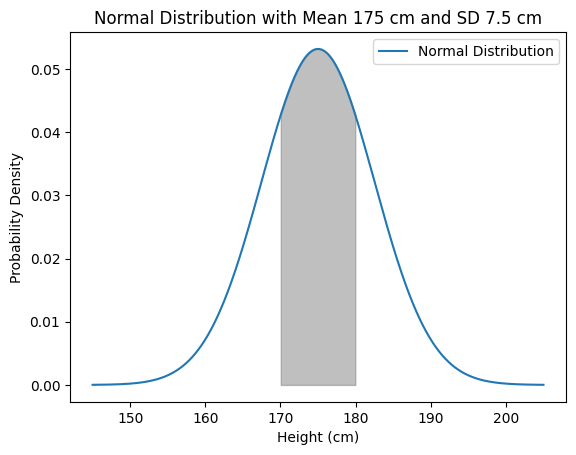

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Mean and standard deviation
mu = 175
sigma = 7.5

# Create a range of values
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)

# Calculate the PDF
pdf = stats.norm.pdf(x, mu, sigma)

# Plot the PDF
plt.plot(x, pdf, label='Normal Distribution')
plt.fill_between(x, pdf, where=((x >= 170) & (x <= 180)), color='gray', alpha=0.5)
plt.title('Normal Distribution with Mean 175 cm and SD 7.5 cm')
plt.xlabel('Height (cm)')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

### <ins>Binomial Distribution</ins>
The binomial distribution is a discrete probability distribution that models the number of successes in a fixed number of independent Bernoulli trials (or binomial trials), each with the same probability of success. It is used scenarios where there are two possible outcomes - success and failure - for each trial.

#### Characteristics
- **Number of Trials $(n)$**: The fixed number of Bernoulli trials.
- **Probability of Success $(p)$**: The probability of success on each trial.
- **Random Variable $(X)$**: The number of successes in $n$ trials.

#### Probability Mass Function (PMF) (For Binomial Probability)
The probability of obtaining exactly $k$ successes in $n$ trials is given by the PMF:
$$
P(X = k) = \binom{n}{k}p^k(1-p)^{n-k}
$$

where:

- $\binom{n}{k} = \frac{n!}{k!(n-k)}$ is the binomial coefficient, representing the number of ways to choose $k$ successes out of $n$ trials.
- $p$ is the probability of success.
- $(1-p)$ is the probability of failure.

Lets look at an example that is most definitely a reflection of my experience, but a common occurrence that can happen to anyone. Suppose that you are playing *Overwatch* and the probability of you getting a bad team is $p = 0.5$. You play 10 matches, what is the probability that you lose exactly 6 matches?

1. Identify parameters:
    - $n = 10$
    - $p = 0.5$
    - $k = 6$

2. Calculate the binomial coefficient:
$$
\binom{10}{6} = 210
$$

3. Plug into the PMF formula:
$$
P(X = 6) = 210 \times (0.5)^6 \times (0.5)^4 = 210 \times (0.5)^10 = 210 \times \frac{1}{1024} \approx 0.2051
$$

So your chances of losing exactly 6 matches is approximately 21%. Quite lucky!

Now the same thing pin Python:

In [12]:
# Parameters
n = 10
p = 0.5
k = 6

# Calculate the probability
probability = stats.binom.pmf(k, n, p)
print(f"Probability of losing exactly 6 matches in 10 total matches: {probability:.4f}")

Probability of losing exactly 6 matches in 10 total matches: 0.2051


We can also visualize your achievement to really sink it in: 

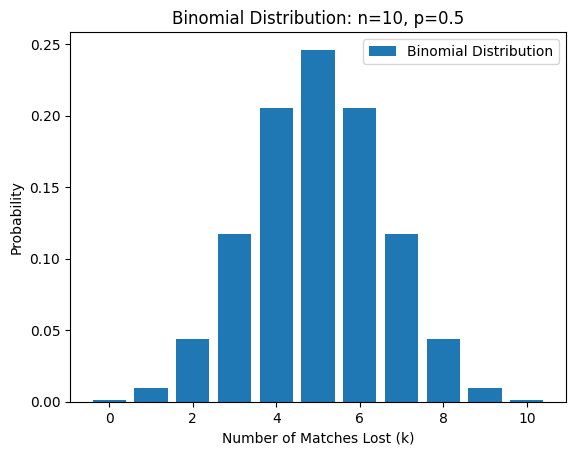

In [13]:
# Parameters
n = 10
p = 0.5

# Create a range of values
k_values = np.arange(0, n+1)

# Calculate the PMF
pmf_values = stats.binom.pmf(k_values, n, p)

# Plot the PMF
plt.bar(k_values, pmf_values, label='Binomial Distribution')
plt.xlabel('Number of Matches Lost (k)')
plt.ylabel('Probability')
plt.title('Binomial Distribution: n=10, p=0.5')
plt.legend()
plt.show()

### <ins>Poisson Distribution</ins>
The Poisson distribution is a discrete probability distribution that models the number of events occurring within a fixed interval of time or space, given that these events happen at a constant average rate and independently of the time since the last event.

#### Characteristics:
- **Rate $(\lambda)$**: The average number of events in a given interval.
- **Random Variable $(X)$**: The number of events in the interval.

#### Probability Mass Function (PMF) (For Poisson Probability)
You might have noticed how we use PMF here too. This is not to confuse you. When we talk about PMF, the form of the formula differs depending on where we use it. Here the probability of observing $k$ events in the interval is given by the PMF:
$$
P(X = k) = \frac{\lambda^k e^{-\lambda}}{k!}
$$

where:

- $\lambda$ is the average rate of events.
- $k$ is the number of events.
- $e$ is the base of the natural logarithm (approx. 2.71828).

Lets have another common occurrence that happens to everyone playing competitive games. Suppose that you get heated by losing so many matches in the game and report an average of 5 players per hour $(\lambda = 5)$ for ruining your game. What is the probability that you report exactly 3 players in the next hour?

1. Identify parameters:
    - $\lambda = 5$
    - $k = 3$

2. Plug into the PMF formula:
$$
P(X = 3) = \frac{5^3 e^{-5}}{3!} = \frac{125 \cdot e^{-5}}{6} \approx \frac{125 \cdot 0.0067}{6} \approx 0.1404
$$

So there is approximately 14% chance that you will report exactly 3 players within the next hour you play the game.

Python way of calculating it:

In [14]:
# Parameters
lambda_ = 5
k = 3

# Calculate the probability
probability = stats.poisson.pmf(k, lambda_)
print(f"Probability of reporting exactly 3 players in the next hour: {probability:.4f}")

Probability of reporting exactly 3 players in the next hour: 0.1404


Next the visualization of the Poisson distribution for an average rate of 5 reports per hour:

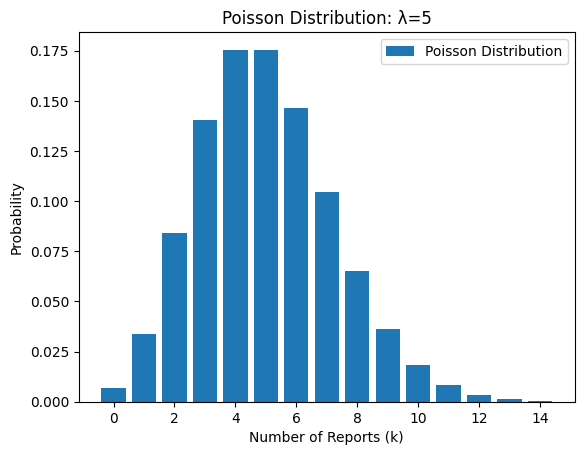

In [15]:
# Parameters
lambda_ = 5

# Create a range of values
k_values = np.arange(0, 15)

# Calculate the PMF
pmf_values = stats.poisson.pmf(k_values, lambda_)

# Plot the PMF
plt.bar(k_values, pmf_values, label='Poisson Distribution')
plt.xlabel('Number of Reports (k)')
plt.ylabel('Probability')
plt.title('Poisson Distribution: λ=5')
plt.legend()
plt.show()